In [44]:
import os
import warnings
from tqdm import tqdm
import random
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

tqdm.pandas()
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [45]:
courses_path = "./courses/courses.csv"
mm_path = "./datasets/major_minor.csv"
students_path = "./courses/students.csv"
merged_path = "./datasets/course_students.csv"

In [46]:
df = pd.read_csv(courses_path)
df["field"] = df["department"].apply(lambda x: "Sciences" if x in ["BIO", "PHY", "CHM", "CS", "MAT"] else "Econ, Finance & ENT" if x in ["ECO", "FIN", "ENT"] else "Social Sciences" if x in ["PSY", "POL", "ES"] else "Humanities" if x in ["MS", "CHI", "SOA", "PHI", "VA", "PA", "CW", "ENG", "IR", "HIS", "PHI"] else "Foundational" if x in ["CT", "FC", "CC"] else "Other")
df

,semester,name,code,schedule_id,course_id,term,year,acad_year,department,is_ism,is_crosslist,field
0,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],SCH00000031,CRS00004743,Monsoon,2024,2024-2025,AST,False,True,Other
1,Monsoon 2024,Cosmic Messengers -2 (Laboratory),[AST-3880/ AST-4880/ PHY-3880/ PHY-4880/ PHY-6...,SCH00000031,CRS00004745,Monsoon,2024,2024-2025,AST,False,True,Other
2,Monsoon 2024,Introduction to Biology 3: Molecular Genetics ...,[BIO-2201],SCH00000031,CRS00003118,Monsoon,2024,2024-2025,BIO,False,False,Sciences
3,Monsoon 2024,Laboratory Course 2: Molecular Biology and Bio...,[BIO-2212],SCH00000031,CRS00000873,Monsoon,2024,2024-2025,BIO,False,False,Sciences
4,Monsoon 2024,Introduction to Biology II: Cell Biology,[BIO-2214],SCH00000031,CRS00003225,Monsoon,2024,2024-2025,BIO,False,False,Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...
6427,Monsoon 2014,Introduction to Ethics and Global Citizenship,[PHI-209],SCH00000001,CRS00000518,Monsoon,2014,2014-2015,PHI,False,False,Humanities
6428,Monsoon 2014,Introduction to Political Theory,[POL-101],SCH00000001,CRS00000031,Monsoon,2014,2014-2015,POL,False,False,Social Sciences
6429,Monsoon 2014,Introduction to Psychology,[PSY-1001],SCH00000001,CRS00000032,Monsoon,2014,2014-2015,PSY,False,False,Social Sciences
6430,Monsoon 2014,Visual Arts,[VA-001],SCH00000001,CRS00000034,Monsoon,2014,2014-2015,VA,False,False,Humanities


In [47]:
df[(df["department"] == "CS") & (df["is_ism"] == True)]

,semester,name,code,schedule_id,course_id,term,year,acad_year,department,is_ism,is_crosslist,field
83,Monsoon 2024,An efficient agent-based approach to epidemic ...,[CS-IS-2018],SCH00000031,CRS00005665,Monsoon,2024,2024-2025,CS,True,False,Sciences
84,Monsoon 2024,Rustification - An Introduction to Rust,[CS-IS-3077],SCH00000031,CRS00005594,Monsoon,2024,2024-2025,CS,True,False,Sciences
85,Monsoon 2024,Computational and Neural Foundations of Memory...,[CS-IS-3078],SCH00000031,CRS00005611,Monsoon,2024,2024-2025,CS,True,False,Sciences
86,Monsoon 2024,Rapid Prototyping and Expermentation II,[CS-IS-3079],SCH00000031,CRS00005684,Monsoon,2024,2024-2025,CS,True,False,Sciences
87,Monsoon 2024,E-commerce Interface Design Study,[CS-IS-3080],SCH00000031,CRS00005698,Monsoon,2024,2024-2025,CS,True,False,Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...
3476,Monsoon 2020,Infomation and Elections: A data-driven approach,[CS-IS-3003],SCH00000019,CRS00002766,Monsoon,2020,2020-2021,CS,True,False,Sciences
3477,Monsoon 2020,Privacy Preserving Computation,[CS-IS-3004],SCH00000019,CRS00002767,Monsoon,2020,2020-2021,CS,True,False,Sciences
3478,Monsoon 2020,Building a Nation-scale Synthetic Population D...,[CS-IS-3005],SCH00000019,CRS00002769,Monsoon,2020,2020-2021,CS,True,False,Sciences
3479,Monsoon 2020,Quantum Computing,[CS-IS-4001],SCH00000019,CRS00002773,Monsoon,2020,2020-2021,CS,True,False,Sciences


In [48]:
# students = pd.read_csv(students_path)
# df2 = pd.read_csv(mm_path)
# students = pd.merge(students, df2, how="left", left_on=["name", "email"], right_on=["name", "email"], suffixes=("", "_c"))
# students = pd.merge(students, df, how="left", left_on=["schedule_id", "course_id"], right_on=["schedule_id", "course_id"], suffixes=("", "_course"))
# students = students[students["status"] == "Confirmed"]
# students

In [49]:
def remove_tas(faculty_string):
    faculty = ""
    for teacher in faculty_string.split(","):
        if teacher.strip() in students["name"].values:
            continue
        else:
            faculty = teacher if faculty == "" else faculty + ", " + teacher
    return faculty

In [50]:
# faculty = students["faculty"].progress_apply(lambda x: str(x) if "," not in str(x) else remove_tas(str(x)))
# students["faculty"] = pd.Series(faculty).apply(lambda x: x if x != "nan" else "")

# students.to_csv(students_path, index=False)

In [61]:
df2 = pd.read_csv(mm_path)
students = pd.read_csv(merged_path)
students

,course_id,faculty,schedule_id,ls,ds,name,ashoka_id,sysgen_id,email,status,...,semester,name_course,code,term,year,acad_year,department,is_ism,is_crosslist,field
0,CRS00004743,Sujan Kumar Sengupta,SCH00000031,1,0.0,Samadrita De,1020221085,USR00019782,samadrita.de_ug25@ashoka.edu.in,Confirmed,...,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True,Other
1,CRS00004743,Sujan Kumar Sengupta,SCH00000031,1,0.0,Hiyaa Atreya,1020221248,USR00020393,hiyaa.atreya_ug25@ashoka.edu.in,Confirmed,...,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True,Other
2,CRS00004743,Sujan Kumar Sengupta,SCH00000031,1,0.0,Mehek Fatima Naqvi,1020221352,USR00020558,mehek.naqvi_ug25@ashoka.edu.in,Confirmed,...,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True,Other
3,CRS00004743,Sujan Kumar Sengupta,SCH00000031,1,0.0,Tannuvi Agarwal,1020221387,USR00020630,tannuvi.agarwal_ug25@ashoka.edu.in,Confirmed,...,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True,Other
4,CRS00004743,Sujan Kumar Sengupta,SCH00000031,1,0.0,Mansi Bisht,1020221396,USR00020645,mansi.bisht_ug25@ashoka.edu.in,Confirmed,...,Monsoon 2024,The Earth and Other Planets,[AST-2840/ AST-3840/ PHY-3840],Monsoon,2024,2024-2025,AST,False,True,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156981,CRS00000034,NaN,SCH00000001,1,0.0,Shreyas Shende,UG-14-0556,USR00000641,shreyas.shende@ashoka.edu.in,Confirmed,...,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False,Humanities
156982,CRS00000034,NaN,SCH00000001,1,0.0,Kamalavelan S,UG-14-2548,USR00000591,kamalavelan.s@ashoka.edu.in,Confirmed,...,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False,Humanities
156983,CRS00000034,NaN,SCH00000001,1,0.0,Abhyankar Panth,UG-14-1362,USR00000544,abhyankar.panth@ashoka.edu.in,Confirmed,...,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False,Humanities
156984,CRS00000034,NaN,SCH00000001,1,0.0,Paras Bhattrai,UG-14-3308,USR00000620,paras.bhattrai@ashoka.edu.in,Confirmed,...,Monsoon 2014,Visual Arts,[VA-001],Monsoon,2014,2014-2015,VA,False,False,Humanities


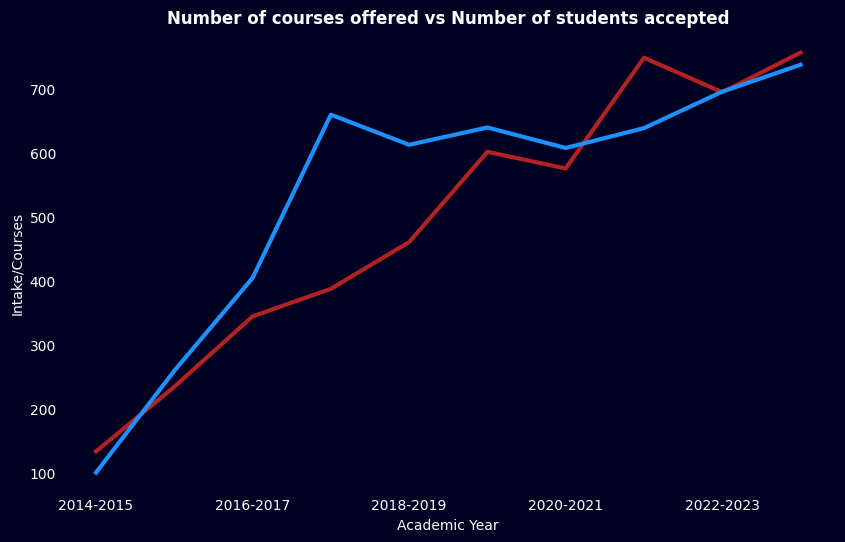

In [ ]:
plt.figure(figsize=(10, 6))
ax2 = df2[df2["program"] == "UG"].groupby(["batch"])["batch"].count().plot(kind='line', linewidth=3, fontsize=10, color="firebrick", logy=False)
ax = df[(df["acad_year"] != "2024-2025") & (df["is_ism"] == False)].groupby(["acad_year"])["code"].count().plot(kind='line', linewidth=3, fontsize=10, color="dodgerblue", logy=False)
plt.title('Number of courses offered vs Number of students accepted', weight="bold", fontsize=12)

import matplotlib.ticker as ticker
# ax.plot(np.array(ax.get_xlim()), np.array(ax.get_ylim()), '--', color='lightcoral', linewidth=1)
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')

plt.xlabel('Academic Year', fontsize=10)
plt.ylabel('Intake/Courses', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/batchsize.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

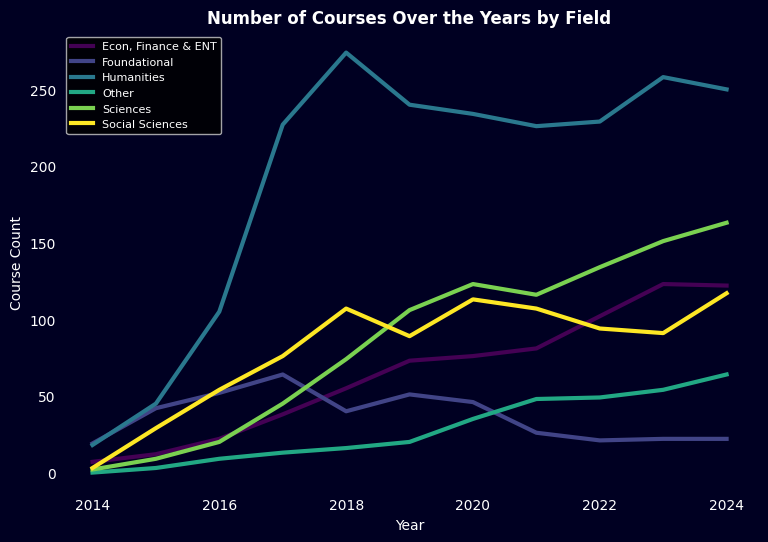

In [53]:
category_counts = df[(df["term"] != "Summer") & (df["is_ism"] == False)].groupby(['year', 'field']).size().reset_index(name='count')
pivot_df = category_counts.pivot(index='year', columns='field', values='count').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Number of Courses Over the Years by Field', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(9, 6)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Course Count', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=8, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/stem.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

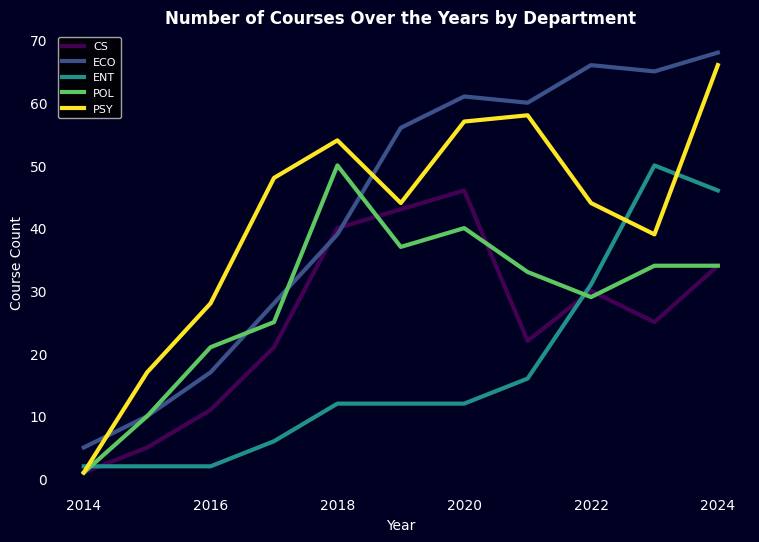

In [54]:
category_counts = df[(df["term"] != "Summer") & (df["is_ism"] == False)].groupby(['year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "ENT", "CS", "POL"]))]

pivot_df = category_counts.pivot(index='year', columns='department', values='count').fillna(0)

ax = pivot_df.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis")
plt.title('Number of Courses Over the Years by Department', weight="bold", fontsize=12)

ax.set_facecolor("#000022")
fig = ax.get_figure()
fig.patch.set_facecolor('#000022')
plt.gcf().set_size_inches(9, 6)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Course Count', fontsize=10)
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

plt.legend(fontsize=8, loc="upper left")
plt.grid(False)
plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/stem.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

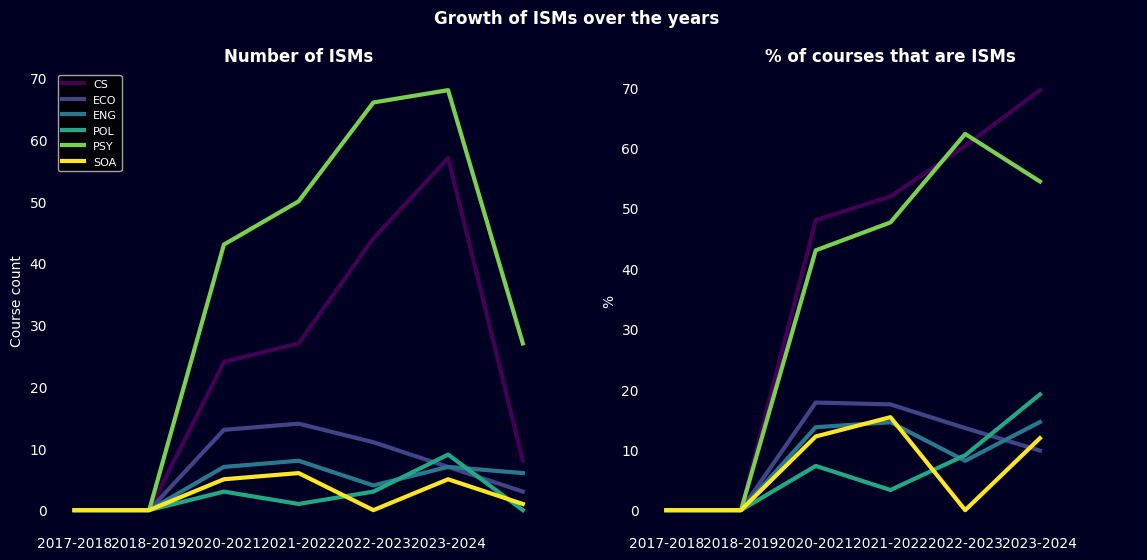

In [55]:
# Number of ISMs
category_counts = df[(df["acad_year"] != "2024-25") & (df["is_ism"] == True)].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS", "POL", "ENG", "SOA"]))]

pivot_df1 = category_counts.pivot(index='acad_year', columns='department', values='count').fillna(0)
pivot_df1 = pd.concat([pd.DataFrame(0, index=["2017-2018", "2018-2019"], columns=pivot_df1.columns), pivot_df1])

# % of ISMSs
category_counts = df[(df["acad_year"] != "2024-2025") & (df["is_ism"] == True)].groupby(['acad_year', 'department']).size().reset_index(name='count')
yearly_totals = df[(df["acad_year"] != "2024-2025")].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS", "POL", "ENG", "SOA"]))]

category_counts = yearly_totals.merge(category_counts, on=['acad_year', 'department'], suffixes=('_total', ''))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df2 = category_counts.pivot(index='acad_year', columns='department', values='percentage').fillna(0)
pivot_df2 = pd.concat([pd.DataFrame(0, index=["2017-2018", "2018-2019"], columns=pivot_df2.columns), pivot_df2])

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Growth of ISMs over the years", weight="bold", x=0.5, y=0.98, fontsize=12)

pivot_df1.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df2.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1], legend=False)

axes[0].set_ylabel("Course count", fontsize=10)
axes[1].set_ylabel("%", fontsize=10)
axes[0].legend(fontsize=8, loc="upper left")
axes[0].set_title("Number of ISMs", weight="bold")
axes[1].set_title("% of courses that are ISMs", weight="bold")

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

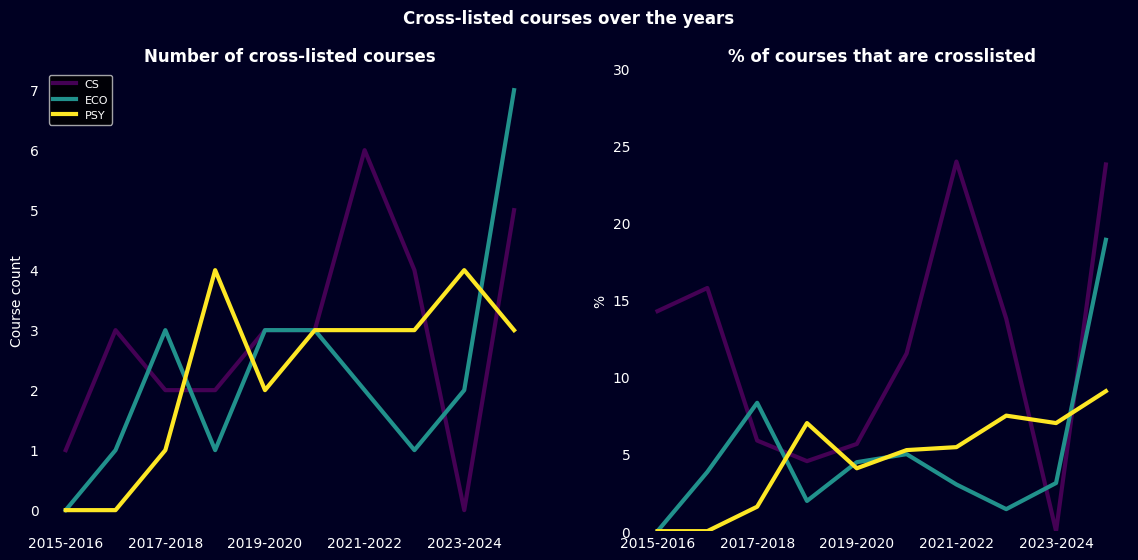

In [56]:
# Number of ISMs
category_counts = df[(df["year"] > 2015) & (df["is_crosslist"] == True) & (df["is_ism"] == False)].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS"]))]

pivot_df1 = category_counts.pivot(index='acad_year', columns='department', values='count').fillna(0)

# % of ISMSs
category_counts = df[(df["year"] > 2015) & (df["is_crosslist"] == True) & (df["is_ism"] == False)].groupby(['acad_year', 'department']).size().reset_index(name='count')
yearly_totals = df[(df["year"] > 2015) & (df["is_ism"] == False)].groupby(['acad_year', 'department']).size().reset_index(name='count')
category_counts = category_counts[(category_counts["department"].isin(["ECO", "PSY", "CS"]))]

category_counts = yearly_totals.merge(category_counts, on=['acad_year', 'department'], suffixes=('_total', ''))
category_counts['percentage'] = (category_counts['count'] / category_counts['count_total']) * 100
pivot_df2 = category_counts.pivot(index='acad_year', columns='department', values='percentage').fillna(0)

fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(14, 6), facecolor="#000022")
fig.suptitle("Cross-listed courses over the years", weight="bold", x=0.5, y=0.98, fontsize=12)

pivot_df1.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[0])
pivot_df2.plot(kind='line', linewidth=3, fontsize=10, colormap="viridis", ax=axes[1], legend=False)

axes[0].set_ylabel("Course count", fontsize=10)
axes[1].set_ylabel("%", fontsize=10)
axes[0].legend(fontsize=8, loc="upper left")
axes[0].set_title("Number of cross-listed courses", weight="bold")
axes[1].set_title("% of courses that are crosslisted", weight="bold")
axes[1].set_ylim(0, 30)

for ax in axes:
    ax.set_facecolor("#000022")
    ax.set_xlabel("")
    ax.tick_params(axis='x', which='both', length=0)
    ax.tick_params(axis='y', which='both', length=0)

    ax.grid(False)
    plt.setp(ax.spines.values(), lw=0)

plt.show()
# plt.savefig(f"./major_minor/comparison.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

In [57]:
ug17 = df[(df["acad_year"] == "2016-2017") & (df["is_ism"] == False)]
ug24 = df[(df["acad_year"] == "2023-2024") & (df["is_ism"] == False)]

majors = ['PSY', 'ECO', 'CS', 'POL', 'FC', 'CT', 'BIO', 'SOA', 'ENG', 'IR', "MS", "VA", "PA", "ENT", 'CW', 'PHY', 'MAT', 'PHI', 'HIS', 'ES', 'CHI', 'CHM']

ug17["department"] = ug17["department"].apply(lambda x: x if x in majors else "CC" if x in ["CVA", "CLA", "CPA"] else "Other")
ug24["department"] = ug24["department"].apply(lambda x: x if x in majors else "CC" if x in ["CVA", "CLA", "CPA"] else "Other")

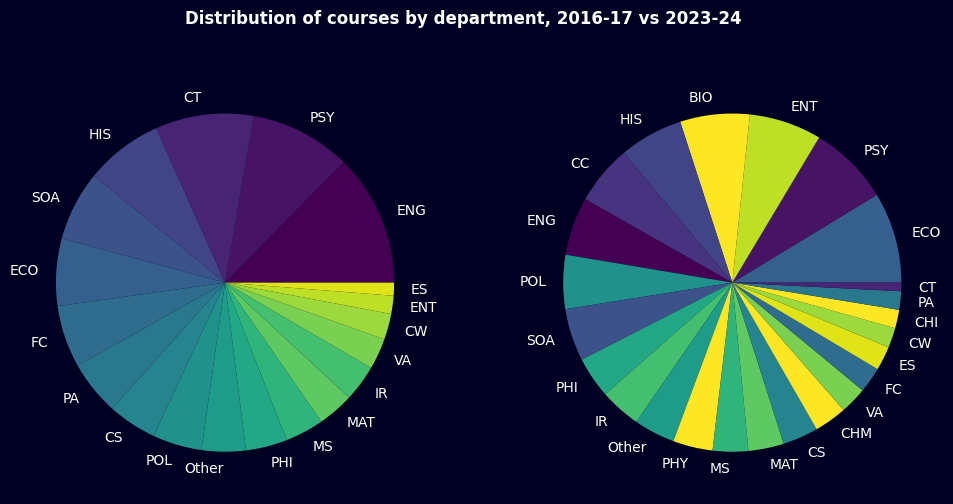

In [58]:
ug17values = ug17["department"].value_counts()
ug24values = ug24["department"].value_counts()

majorcolors = {label: color  for label, color in zip(['ENG', 'PSY', 'CT', 'CC', 'HIS', 'SOA', 'ECO', 'FC', 'PA', 'CS', 'POL', 'Other', 'PHI', 'MS', 'IR', 'MAT', 'VA', 'CW', 'ENT', 'ES', 'BIO', 'PHY', 'CHM', 'CHI'], (plt.get_cmap('viridis')(i / 20) for i in range(len(majors)+3)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of courses by department, 2016-17 vs 2023-24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["department"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["department"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()
# plt.savefig(f"./major_minor/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

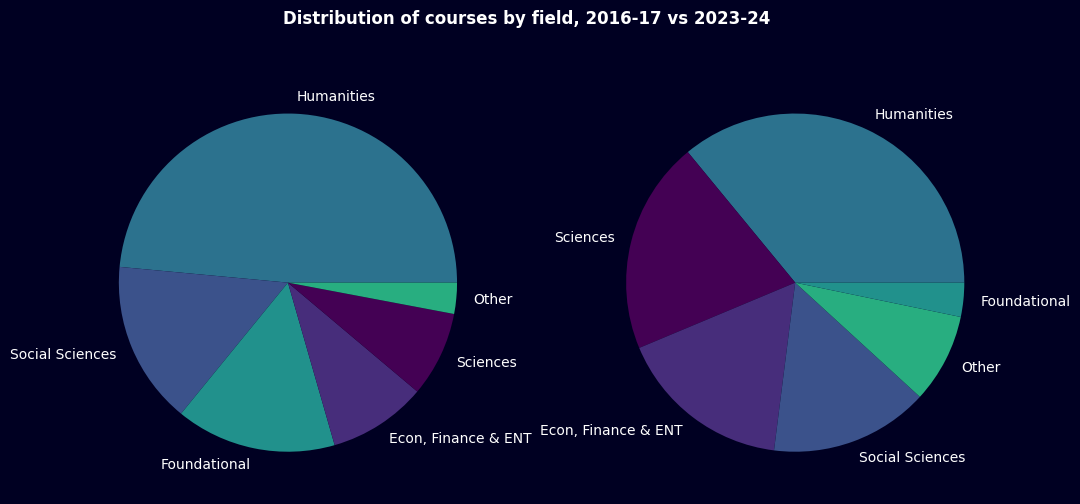

In [59]:
ug17values = ug17["field"].value_counts()
ug24values = ug24["field"].value_counts()

majorcolors = {label: color  for label, color in zip(["Sciences", "Econ, Finance & ENT", "Social Sciences", "Humanities", "Foundational", "Other"], (plt.get_cmap('viridis')(i / 8) for i in range(8)))}

fig, axes = plt.subplots(ncols=2, figsize=(12, 6), facecolor="#000022")
fig.suptitle("Distribution of courses by field, 2016-17 vs 2023-24", weight="bold", x=0.5, y=0.95)
ug17values.plot.pie(ax=axes[0], fontsize=10, colors=[majorcolors[v] for v in ug17["field"].value_counts().keys()])
ug24values.plot.pie(ax=axes[1], fontsize=10, colors=[majorcolors[v] for v in ug24["field"].value_counts().keys()])
axes[0].set_axis_off()
axes[1].set_axis_off()

plt.show()
# plt.savefig(f"./major_minor/majorpie.png", dpi=600, bbox_inches="tight", edgecolor="#000022", facecolor=fig.get_facecolor())
# plt.clf()

In [63]:
smth = students[(students["term"] != "Summer") & (students["is_ism"] == False)].groupby(["year", "department", "semester", "faculty"])["name_course"].value_counts().reset_index(name="count")
smth[smth["count"] > 5]

,year,department,semester,faculty,name_course,count
0,2014,CT,Monsoon 2014,"Aruni Kashyap, Saikat Majumdar",Introduction to Critical Thinking,31
1,2014,CT,Monsoon 2014,Mandakini Dubey,Introduction to Critical Thinking,28
2,2014,CT,Monsoon 2014,Rich Rice,Introduction to Critical Thinking,41
3,2014,FC,Monsoon 2014,Aparna Vaidik,Trends in History,42
4,2014,FC,Monsoon 2014,Gilles Verniers,Social and Political Formations,13
...,...,...,...,...,...,...
5266,2024,VA,Spring 2024,Rakhi Peswani,Arts of our Times II - Media as Material of Pr...,11
5267,2024,VA,Spring 2024,Sraman Mukherjee,"Sites and Sights: Museums, Exhibitions and the...",22
5268,2024,VA,Spring 2024,"Sraman Mukherjee, Rakhi Peswani","On Photography: Histories, Theories, and Pract...",20
5269,2024,VA,Spring 2024,Srinivas Adiya Mopidevi,Curating Contemporary Art: From Artists’ Studi...,20


In [65]:
smth.groupby(["year", "faculty", "name_course"])["count"].sum().reset_index().sort_values("count", ascending=False)

,year,faculty,name_course,count
4519,2024,"Bittu R, Vikrant, Stuti",Introduction to Neuroscience/ Biological Psych...,211
2635,2021,"Mukul Sharma, Arunopol Seal, Sweeta Suman",Environmental Studies,195
1978,2020,"Mahesh Rangarajan, Nivedita Bose, Romyarup M...",Environmental Studies,195
867,2018,Meghna Agarwala,Environmental Studies,194
631,2018,Abir Bashir Bazaz,Literature and the World,194
...,...,...,...,...
1618,2019,Thomas Michael Mccarthy,Independent Study Module: Aesthetic Theory,1
307,2017,Abhinash Borah,Independent Study Module,1
817,2018,Madhavi Latha Kari,Independent Research Methodology: Impact of Cr...,1
824,2018,Mahabir Prasad Jhanwar,Advanced Independent Study Module: Lattice Bas...,1
